In [ ]:
# general libraries
import pandas as pd
import numpy as np
import warnings
import time
import re
from tqdm import tqdm
from collections import Counter
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import graphviz
from sklearn.tree import export_graphviz

# Outlier detection
# import imbalanced-learn
import scipy.stats as stats
from sklearn.ensemble import IsolationForest

# modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
# general libraries
import time
import warnings
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from collections import Counter
warnings.filterwarnings("ignore")

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

# modelling
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# eval metrics
from sklearn.metrics import (precision_score, recall_score, f1_score)

In [ ]:
# General Libraries
import re
import time
import json
import pickle
import warnings
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from collections import Counter
warnings.filterwarnings("ignore")

# Visualizations
import seaborn as sns
from termcolor import colored
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import (train_test_split, GridSearchCV,
                                     StratifiedKFold)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier,  
                              GradientBoostingClassifier)
from sklearn.model_selection import cross_validate
from sklearn.metrics import (ConfusionMatrixDisplay, precision_score, recall_score)

# Imblearn
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import (SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE)
from imblearn.under_sampling import (TomekLinks, NearMiss, AllKNN,
                                     EditedNearestNeighbours, 
                                     RepeatedEditedNearestNeighbours) 
from imblearn.combine import SMOTETomek, SMOTEENN

# SHAP


# # Model deployment
# from flask import Flask
# import streamlit as st

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 12.4 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/final_file.csv")

In [ ]:
data_final = df.copy(deep=True)

In [ ]:
data_final = data_final[['school_type', 'region', 'province', 'legislative', 'division',  'total_enrollees', 'total_instructors',
'poverty_incidence_among_families',    'population_as_of_may_2020',    'unemployment_rate_per_region']]

In [ ]:
to_drop = []

for col in tqdm(data_final.columns):
    if data_final[col].dtype == 'O': # if data is an object type
        dummies = pd.get_dummies(data_final[col], prefix=col, drop_first=False) # create binary/dummy variable, using column name as the prefix
        data_final = pd.concat([data_final, dummies], axis=1) # 
        to_drop.append(col)

data_final = data_final.drop(to_drop, axis=1)
data_final.head()

  0%|          | 0/10 [00:00<?, ?it/s]

,school_type,total_enrollees,total_instructors,poverty_incidence_among_families,population_as_of_may_2020,unemployment_rate_per_region,region_ARMM,region_CAR,region_CARAGA,region_NCR,region_REGION I,region_REGION II,region_REGION III,region_REGION IVA,region_REGION IVB,region_REGION IX,region_REGION V,region_REGION VI,region_REGION VII,region_REGION VIII,region_REGION X,region_REGION XI,region_REGION XII,province_ABRA,province_AGUSAN DEL NORTE,province_AGUSAN DEL SUR,province_AKLAN,province_ALBAY,province_ANTIQUE,province_APAYAO,province_AURORA,province_BASILAN,province_BATAAN,province_BATANES,province_BATANGAS,province_BENGUET,province_BILIRAN,province_BOHOL,province_BUKIDNON,province_BULACAN,province_CAGAYAN,province_CAMARINES NORTE,province_CAMARINES SUR,province_CAMIGUIN,province_CAPIZ,province_CATANDUANES,province_CAVITE,province_CEBU,province_CITY OF COTABATO,province_COMPOSTELA VALLEY,province_DAVAO DEL NORTE,province_DAVAO DEL SUR,province_DAVAO ORIENTAL,province_DINAGAT ISLANDS,province_EASTERN SAMAR,province_GUIMARAS,province_IFUGAO,province_ILOCOS NORTE,province_ILOCOS SUR,province_ILOILO,province_ISABELA,province_KALINGA,province_LA UNION,province_LAGUNA,province_LANAO DEL NORTE,province_LANAO DEL SUR,province_LEYTE,province_MAGUINDANAO,"province_MANILA, NCR, FIRST DISTRICT",province_MARINDUQUE,province_MASBATE,province_MISAMIS OCCIDENTAL,province_MISAMIS ORIENTAL,province_MOUNTAIN PROVINCE,province_NCR FOURTH DISTRICT,province_NCR SECOND DISTRICT,province_NCR THIRD DISTRICT,province_NEGROS OCCIDENTAL,province_NEGROS ORIENTAL,province_NORTH COTABATO,province_NORTHERN SAMAR,province_NUEVA ECIJA,province_OCCIDENTAL MINDORO,province_ORIENTAL MINDORO,province_PALAWAN,province_PAMPANGA,province_PANGASINAN,province_QUEZON,province_QUIRINO,province_RIZAL,province_ROMBLON,province_SARANGANI,province_SIQUIJOR,province_SORSOGON,province_SOUTH COTABATO,province_SOUTHERN LEYTE,province_SULTAN KUDARAT,province_SULU,province_SURIGAO DEL NORTE,province_SURIGAO DEL SUR,province_TARLAC,province_TAWI-TAWI,province_WESTERN SAMAR,province_ZAMBALES,province_ZAMBOANGA DEL NORTE,province_ZAMBOANGA DEL SUR,province_ZAMBOANGA SIBUGAY,legislative_1ST,legislative_2ND,legislative_3RD,legislative_4TH,legislative_5TH,legislative_6TH,legislative_7TH,legislative_LONE,division_ABRA,division_AGUSAN DEL NORTE,division_AGUSAN DEL SUR,division_AKLAN,division_ALAMINOS CITY,division_ALBAY,division_ANGELES CITY,division_ANTIPOLO CITY,division_ANTIQUE,division_APAYAO,division_AURORA,division_BACOLOD CITY,division_BAGO CITY,division_BAGUIO CITY,division_BAIS CITY,division_BALANGA CITY,division_BASILAN,division_BATAAN,division_BATANES,division_BATANGAS,division_BATANGAS CITY,division_BAYAWAN CITY,division_BENGUET,division_BILIRAN,division_BISLIG CITY,division_BOGO CITY,division_BOHOL,division_BUKIDNON,division_BULACAN,division_BUTUAN CITY,division_CABANATUAN CITY,division_CADIZ CITY,division_CAGAYAN,division_CAGAYAN DE ORO CITY,division_CALAMBA CITY,division_CALAPAN CITY,division_CALBAYOG CITY,division_CALOOCAN CITY,division_CAMARINES NORTE,division_CAMARINES SUR,division_CAMIGUIN,division_CANDON CITY,division_CAPIZ,division_CARCAR CITY,division_CATANDUANES,division_CAUAYAN CITY,division_CAVITE,division_CAVITE CITY,division_CEBU,division_CEBU CITY,division_CITY OF NAGA CEBU,division_CITY OF SAN JUAN,division_COMPOSTELA VALLEY,division_COTABATO CITY,division_DAGUPAN CITY,division_DANAO CITY,division_DASMARINAS CITY,division_DAVAO CITY,division_DAVAO DEL NORTE,division_DAVAO DEL SUR,division_DAVAO ORIENTAL,division_DIGOS CITY,division_DINAGAT ISLAND,division_DIPOLOG CITY,division_DUMAGUETE CITY,division_EASTERN SAMAR,division_ESCALANTE CITY,division_GAPAN CITY,division_GENERAL SANTOS CITY,division_GINGOOG CITY,division_GUIHULNGAN CITY,division_GUIMARAS,division_IFUGAO,division_ILIGAN CITY,division_ILOCOS NORTE,division_ILOCOS SUR,division_ILOILO,division_ILOILO CITY,division_IRIGA CITY,division_ISABELA,division_ISLAND GARDEN CITY OF SAMAL,division_KABANKALAN 

In [ ]:
# Target feature
X = data_final.drop(['school_type'], axis=1)

# Response variable
y = data_final['school_type']

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(X, # input data
                                                      y, # target
                                                      random_state=1337, # for reproducability
                                                      test_size=0.25,
                                                      stratify = y) # portion of the test data

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

undersample = RandomUnderSampler(sampling_strategy='majority')
oversample =  RandomOverSampler(sampling_strategy='minority')

# **Base Models for LGBM**

**Undersampling**

In [ ]:
gbm_under = GradientBoostingClassifier(learning_rate=0.001, random_state=1337)
start = time.time()
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)
gbm_under.fit(X_resampled, y_resampled)
end = time.time()

print("accuracy on training set: %f" % gbm_under.score(X_resampled, y_resampled))
print("accuracy on test set: %f" % gbm_under.score(X_test, y_test))
print('Runtime:', end-start)

accuracy on training set: 0.755556
accuracy on test set: 0.752926
Runtime: 0.15517926216125488


**Oversampling**

In [ ]:
gbm_over = GradientBoostingClassifier(learning_rate=0.001, random_state=1337)
start = time.time()
X_resampled, y_resampled = oversample.fit_resample(X_train, y_train)
gbm_over.fit(X_resampled, y_resampled)
end = time.time()

print("accuracy on training set: %f" % gbm_over.score(X_resampled, y_resampled))
print("accuracy on test set: %f" % gbm_over.score(X_test, y_test))
print('Runtime:', end-start)

accuracy on training set: 0.717241
accuracy on test set: 0.811436
Runtime: 8.437159538269043


# **LGBM**

In [ ]:
X = data_final.drop(['school_type'], axis=1)
y = data_final['school_type']
(X_trainval, X_holdout, y_trainval, y_holdout) = train_test_split(X, y, 
                                                                  random_state=11, test_size=0.25,
                                                                  stratify=y)

In [ ]:
def auto_ml(X, y, models_dict, scaler=None, cv=None, res_t=None):
    """Apply resampling for imbalanced data"""
    results = {}
    results2 = {}

    # log start time
    total_start = time.time()

    for model_name, model in tqdm(models_dict.items()):
        
        ################# this portion can be edited ###############
        train_scores = []
        val_scores = []

        train_recall = []
        val_recall = []

        ###########################################################

        for train_index, val_index in tqdm(cv.split(X, y)):

            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]

            # Apply scaling
            if scaler is not None:
                X_train['population_as_of_may_2020'] = scaler.fit_transform(X_train['population_as_of_may_2020'].values.reshape(-1, 1))
                X_val['population_as_of_may_2020'] = scaler.transform(X_val['population_as_of_may_2020'].values.reshape(-1, 1))
            else:
                pass

            # Apply resampling
            if res_t is not None:
                s = time.time()
                X_train, y_train = res_t.fit_resample(X_train, y_train)
                print(f'Resampling done in {time.time() - s}')
            else:
                pass

            start_time = time.time()

            # fit
            model.fit(X_train, y_train)

            # predict
            train_preds = model.predict(X_train)
            val_preds = model.predict(X_val)
            
            ################# this portion can be edited ###############

            # classification accuracy
            train_scores.append(model.score(X_train, y_train))
            val_scores.append(model.score(X_val, y_val))

            # recall
            train_recall.append(recall_score(y_train, train_preds))
            val_recall.append(recall_score(y_val, val_preds))



            end_time = time.time()

            results[model_name] = {
                'Train Accuracy': np.round(np.mean(train_scores) * 100, 2),
                'Val Accuracy': np.round(np.mean(val_scores) * 100, 2),
                # 'Train Precision': np.round(np.mean(train_precision) * 100, 2),
                # 'Val Precision': np.round(np.mean(val_precision) * 100, 2),
                'Train Recall': np.round(np.mean(train_recall) * 100, 2),
                'Val Recall': np.round(np.mean(val_recall) * 100, 2),
                # 'Train F1 Score': np.round(np.mean(train_f1) * 100, 2),
                # 'Val F1 Score': np.round(np.mean(val_f1) * 100, 2),
                'Run Time': end_time - start_time
            }

            results2[model_name] = {
                'Train Accuracy': '{:.2f}%'.format(np.round(np.mean(train_scores)*100, 2)),
                'Val Accuracy': '{:.2f}%'.format(np.round(np.mean(val_scores)*100, 2)),
                # 'Train Precision': '{:.2f}%'.format(np.round(np.mean(train_precision)*100, 2)),
                # 'Val Precision': '{:.2f}%'.format(np.round(np.mean(val_precision)*100, 2)),
                'Train Recall': '{:.2f}%'.format(np.round(np.mean(train_recall)*100, 2)),
                'Val Recall': '{:.2f}%'.format(np.round(np.mean(val_recall)*100, 2)),
                # 'Train F1 Score': '{:.2f}%'.format(np.round(np.mean(train_f1)*100, 2)),
                # 'Val F1 Score': '{:.2f}%'.format(np.round(np.mean(val_f1)*100, 2)),
                'Run Time': end_time - start_time
            }

            
            ###########################################################

    results = pd.DataFrame(results).T
    results2 = pd.DataFrame(results2).T
    return [results, results2]

In [ ]:
models_dict = {
    'gb_base': GradientBoostingClassifier(random_state=11)
}

In [ ]:
auto_run = auto_ml(X_trainval, y_trainval, models_dict, scaler=StandardScaler(),
               cv=StratifiedKFold(n_splits=5))
auto = auto_run[0]
auto_run[1]

  0%|          | 0/1 [00:00<?, ?it/s]
0it [00:00, ?it/s]
1it [00:02,  2.87s/it]
2it [00:06,  3.50s/it]
3it [00:09,  3.19s/it]
4it [00:12,  3.06s/it]
5it [00:15,  3.05s/it]
100%|██████████| 1/1 [00:15<00:00, 15.25s/it]


,Run Time,Train Accuracy,Train Recall,Val Accuracy,Val Recall
gb_base,2.716191,99.21%,99.98%,98.59%,99.69%


With Sampling Techniques

In [ ]:
res_list = [('Random Under-sampling', RandomUnderSampler())]

outputs = []
for title, res in res_list:
    print(colored(title, 'red', attrs=['bold']).center(120, "-"))
    var = auto_ml(X_trainval, y_trainval, models_dict, scaler=StandardScaler(),
                    cv=StratifiedKFold(n_splits=5), res_t=res)
    outputs.append(var[0])
    display(var[1])

-------------------------------------------------Random Under-sampling--------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]
0it [00:00, ?it/s]

Resampling done in 0.04627823829650879



1it [00:00,  4.98it/s]

Resampling done in 0.03265523910522461



2it [00:00,  5.21it/s]

Resampling done in 0.031551361083984375



3it [00:00,  5.35it/s]

Resampling done in 0.03117656707763672



4it [00:00,  5.42it/s]
5it [00:00,  5.17it/s]
100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

Resampling done in 0.04605984687805176


,Run Time,Train Accuracy,Train Recall,Val Accuracy,Val Recall
gb_base,0.141868,93.33%,91.48%,72.09%,72.10%


In [ ]:
res_list = [('Random Over-sampling', RandomOverSampler())]

outputs = []
for title, res in res_list:
    print(colored(title, 'red', attrs=['bold']).center(120, "-"))
    var = auto_ml(X_trainval, y_trainval, models_dict, scaler=StandardScaler(),
                    cv=StratifiedKFold(n_splits=5), res_t=res)
    outputs.append(var[0])
    display(var[1])

--------------------------------------------------Random Over-sampling--------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]
0it [00:00, ?it/s]
1it [00:00,  6.30it/s]

Resampling done in 0.03360414505004883
Resampling done in 0.03427529335021973



2it [00:00,  6.20it/s]
3it [00:00,  6.17it/s]

Resampling done in 0.027189254760742188
Resampling done in 0.036637306213378906



4it [00:00,  5.96it/s]
5it [00:00,  6.01it/s]
100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

Resampling done in 0.0342104434967041


,Run Time,Train Accuracy,Train Recall,Val Accuracy,Val Recall
gb_base,0.120793,91.30%,89.26%,67.04%,65.19%


In [ ]:
models_dict_under = {
    'gb_lr_0.01': GradientBoostingClassifier(learning_rate=0.01, random_state=11)
}

In [ ]:
res_list = [('Random Under-sampling', RandomUnderSampler())]

outputs = []
for title, res in res_list:
    print(colored(title, 'red', attrs=['bold']).center(120, "-"))
    var = auto_ml(X_trainval, y_trainval, models_dict_under, scaler=StandardScaler(),
                    cv=StratifiedKFold(n_splits=5), res_t=res)
    outputs.append(var[0])
    display(var[1])

-------------------------------------------------Random Under-sampling--------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]
0it [00:00, ?it/s]
1it [00:00,  5.76it/s]

Resampling done in 0.03901314735412598
Resampling done in 0.03756904602050781



2it [00:00,  5.70it/s]

Resampling done in 0.03214406967163086



3it [00:00,  5.79it/s]

Resampling done in 0.03306245803833008



4it [00:00,  5.91it/s]

Resampling done in 0.04981517791748047



5it [00:00,  5.71it/s]
100%|██████████| 1/1 [00:00<00:00,  1.13it/s]


,Run Time,Train Accuracy,Train Recall,Val Accuracy,Val Recall
gb_lr_0.01,0.126781,77.69%,85.56%,60.74%,70.37%


In [ ]:
def train_gb(X, y, metric, res_t=None, hypertune=False, resample=False):
    params = {"n_estimators": [1, 10, 50, 100, 200],
              "learning_rate": [1, 0.5, 0.1, 0.01]
             }
    new_params = {'gradientboostingclassifier__' +
                  key: params[key] for key in params}

    skf = StratifiedKFold(n_splits=5)
    if resample is True:
        imba_pipeline = make_pipeline(StandardScaler(),
                                      res_t,
                                      GradientBoostingClassifier(random_state=143))
    else:
        imba_pipeline = make_pipeline(StandardScaler(),
                                      GradientBoostingClassifier(random_state=143))

    if hypertune is True:
        clf = GridSearchCV(imba_pipeline, param_grid=new_params,
                           cv=skf, scoring=metric, return_train_score=True,
                          verbose=10)
        start_time = time.time()
        clf.fit(X, y)
        run_time = (time.time() - start_time)
        model = clf.best_estimator_.fit(X, y)
        return ['Gradient Boosting Classifier', np.mean(clf.cv_results_['mean_train_score']),
                clf.best_score_, 'Best parameters = {0}'.format(
                    clf.best_params_),
                run_time, model]
    else:
        clf = imba_pipeline
        start_time = time.time()
        clf.fit(X, y)
        run_time = (time.time() - start_time)
        cv_scores = cross_validate(estimator=clf, X=X, y=y,
                                   scoring=metric, cv=skf, n_jobs=-1,
                                   return_train_score=True)

        return ['Gradient Boosting Classifier', np.mean(cv_scores['train_score']),
                np.mean(cv_scores['test_score']), run_time, clf]

In [ ]:
start_time = time.time()
gb_tk_rec = train_gb(X_trainval, y_trainval, 'recall', RandomUnderSampler(sampling_strategy = "majority"),
                       hypertune=True, resample=True)
start_time = time.time()
gb_tk_acc = train_gb(X_trainval, y_trainval, 'accuracy', RandomUnderSampler(sampling_strategy = "majority"),
                      hypertune=True, resample=True)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START gradientboostingclassifier__learning_rate=1, gradientboostingclassifier__n_estimators=1
[CV 1/5; 1/20] END gradientboostingclassifier__learning_rate=1, gradientboostingclassifier__n_estimators=1;, score=(train=0.787, test=0.741) total time=   0.0s
[CV 2/5; 1/20] START gradientboostingclassifier__learning_rate=1, gradientboostingclassifier__n_estimators=1
[CV 2/5; 1/20] END gradientboostingclassifier__learning_rate=1, gradientboostingclassifier__n_estimators=1;, score=(train=0.824, test=0.556) total time=   0.0s
[CV 3/5; 1/20] START gradientboostingclassifier__learning_rate=1, gradientboostingclassifier__n_estimators=1
[CV 3/5; 1/20] END gradientboostingclassifier__learning_rate=1, gradientboostingclassifier__n_estimators=1;, score=(train=0.907, test=0.852) total time=   0.0s
[CV 4/5; 1/20] START gradientboostingclassifier__learning_rate=1, gradientboostingclassifier__n_estimators=1
[CV 4/5; 1/20] END gra

In [ ]:
gb_tk_rec

['Gradient Boosting Classifier',
 0.903888888888889,
 0.7703703703703704,
 "Best parameters = {'gradientboostingclassifier__learning_rate': 0.01, 'gradientboostingclassifier__n_estimators': 10}",
 10.459862470626831,
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomundersampler',
                  RandomUnderSampler(sampling_strategy='majority')),
                 ('gradientboostingclassifier',
                  GradientBoostingClassifier(learning_rate=0.01, n_estimators=10,
                                             random_state=143))])]

In [ ]:
gb_tk_acc

['Gradient Boosting Classifier',
 0.8581481481481479,
 0.6703703703703704,
 "Best parameters = {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__n_estimators': 100}",
 10.3581063747406,
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomundersampler',
                  RandomUnderSampler(sampling_strategy='majority')),
                 ('gradientboostingclassifier',
                  GradientBoostingClassifier(random_state=143))])]

In [ ]:
cols = ['', 'Train Accuracy', 'Val Accuracy',
        'Train Recall', 'Val Recall']
hyper = pd.DataFrame(columns=cols)
hyper.loc[0] = [gb_tk_rec[0],
                np.round(gb_tk_acc[1]*100, 6),
                np.round(gb_tk_acc[2]*100, 6),
                np.round(gb_tk_rec[1]*100, 6),
                np.round(gb_tk_rec[2]*100, 6)]
hyper2 = pd.DataFrame(columns=cols)
hyper2.loc[0] = [gb_tk_rec[0],
                 '{:.2f}%'.format(np.round(gb_tk_acc[1]*100, 2)),
                 '{:.2f}%'.format(np.round(gb_tk_acc[2]*100, 2)),
                 '{:.2f}%'.format(np.round(gb_tk_rec[1]*100, 2)),
                 '{:.2f}%'.format(np.round(gb_tk_rec[2]*100, 2))]
hyper2.style.hide_index()

,Train Accuracy,Val Accuracy,Train Recall,Val Recall
Gradient Boosting Classifier,85.81%,67.04%,90.39%,77.04%


In [ ]:
# re-fitting for the holdout
rh = gb_tk_rec[-1]
rh.fit(X_trainval, y_trainval)
y_preds = rh.predict(X_holdout)
rh_holdout_score = recall_score(y_holdout, y_preds)

Base-case

In [ ]:
# cross-validation
base_var = train_gb(X_trainval, y_trainval, 'recall', hypertune=False, resample=False)

# re-fitting for the holdout
base_model = base_var[-1]
base_model.fit(X_trainval, y_trainval)
y_preds = base_model.predict(X_holdout)
holdout_score = recall_score(y_holdout, y_preds)

In [ ]:
cols = ['Method', 'Train Recall', 'Val Recall', 'Holdout Recall']
summary = pd.DataFrame(columns=cols)
summary.loc[0] = ['No Resampling',
                 '{:.2f}%'.format(np.round(base_var[1]*100, 2)),
                 '{:.2f}%'.format(np.round(base_var[2]*100, 2)),
                 '{:.2f}%'.format(np.round(holdout_score*100, 2))]
summary.loc[3] = ['Resampling x Hypertune',
                 '{:.2f}%'.format(np.round(gb_tk_rec[1]*100, 2)),
                 '{:.2f}%'.format(np.round(gb_tk_rec[2]*100, 2)),
                 '{:.2f}%'.format(np.round(rh_holdout_score*100, 2))]
summary.style.hide_index()

Method,Train Recall,Val Recall,Holdout Recall
No Resampling,88.15%,63.70%,70.20%
Resampling x Hypertune,90.39%,77.04%,78.38%


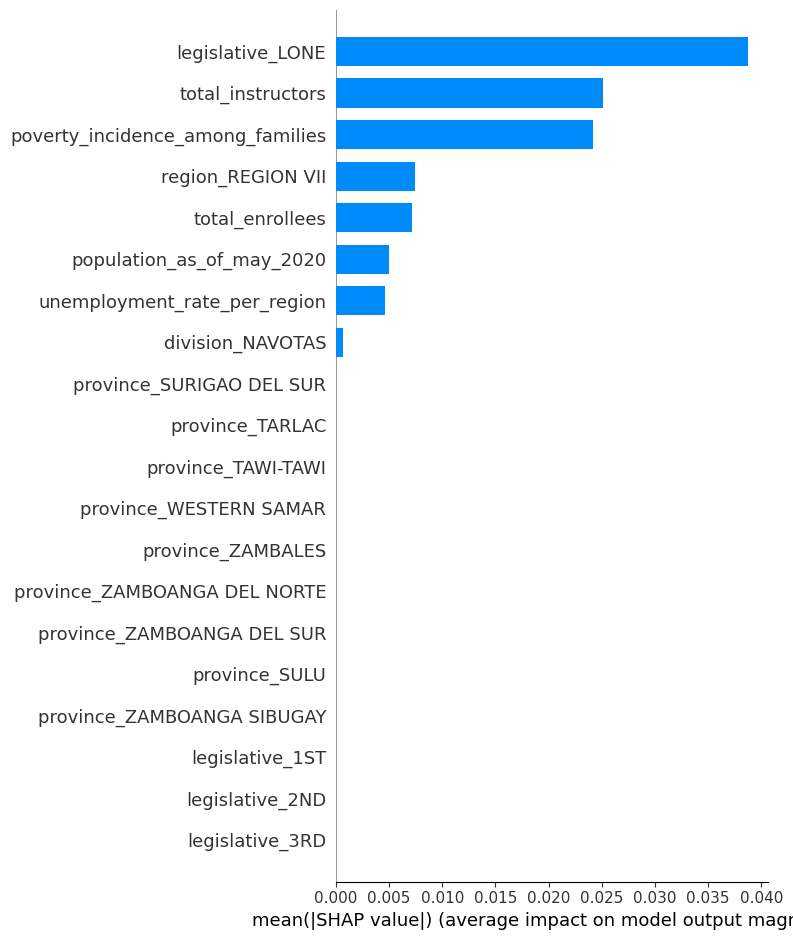

In [ ]:
model = rh['gradientboostingclassifier']
explainer = shap.TreeExplainer(model, feature_names=X_holdout.columns)
shap_values = explainer.shap_values(X_holdout, check_additivity=False)
shap.summary_plot(shap_values, X_holdout.columns, plot_type='bar')